In [5]:
import seaborn as sns
import numpy as np
import pandas as pd

import sys
import os
import re

import pathlib

In [6]:
pd.options.display.max_rows = 100

In [7]:
dataset_dir = "/home/daifukusan/Storage/datasets/violence-against-women-and-girls/makeovermonday-2020w10"
main_dataset = pathlib.Path(dataset_dir).joinpath("violence_data.csv")

In [8]:
df = pd.read_csv(main_dataset)

In [11]:
df[['Country']].drop_duplicates()

,Country
0,Afghanistan
180,Albania
360,Angola
540,Armenia
720,Azerbaijan
900,Bangladesh
1080,Benin
1260,Bolivia
1440,Burkina Faso
1620,Burundi


In [35]:
df[['Survey Year', 'Country']].drop_duplicates()

,Survey Year,Country
0,01/01/2015,Afghanistan
180,01/01/2017,Albania
360,01/01/2015,Angola
540,01/01/2015,Armenia
720,01/01/2006,Azerbaijan
900,01/01/2014,Bangladesh
1080,01/01/2017,Benin
1260,01/01/2008,Bolivia
1440,01/01/2010,Burkina Faso
1620,01/01/2016,Burundi


In [18]:
df_desc = df[['Country', "Survey Year", "Gender", "Question", "Value"]].groupby(by=["Country", "Survey Year", "Gender", "Question"]).describe()

In [19]:
df_desc

Value  \
                                                                       count   
Country     Survey Year Gender Question                                        
Afghanistan 01/01/2015  F      ... for at least one specific reason     14.0   
                               ... if she argues with him               14.0   
                               ... if she burns the food                14.0   
                               ... if she goes out without telling him  14.0   
                               ... if she neglects the children         14.0   
...                                                                      ...   
Zimbabwe    01/01/2015  M      ... if she argues with him               15.0   
                               ... if she burns the food                15.0   
                               ... if she goes out without telling him  15.0   
                               ... if she neglects the children         15.0   
                               ... if she refuses to have sex with him  15.0   

                                                                                   \
                                                                             mean   
Country     Survey Year Gender Question                                             
Afghanistan 01/01/2015  F      ... for at least one specific reason     77.857143   
                               ... if she argues with him               56.064286   
                               ... if she burns the food                16.807143   
                               ... if she goes out without telling him  63.442857   
                               ... if she neglects the children         46.814286   
...                                                                           ...   
Zimbabwe    01/01/2015  M      ... if she argues with him               14.060000   
                               ... if she burns the food                 5.866667   
                               ... if she goes out without telling him  18.486667   
                               ... if she neglects the children         18.806667   
                               ... if she refuses to have sex with him   6.500000   

                                                                                  \
                                                                             std   
Country     Survey Year Gender Question                                            
Afghanistan 01/01/2015  F      ... for at least one specific reason     6.536373   
                               ... if she argues with him               5.984674   
                               ... if she burns the food                2.877890   
                               ... if she goes out without telling him  7.512832   
                               ... if she neglects the children         4.385616   
...                                                                          ...   
Zimbabwe    01/01/2015  M      ... if she argues with him               4.878641   
                               ... if she burns the food                3.071916   
                               ... if she goes out without telling him  7.437729   
                               ... if she neglects the children         5.715576   
                               ... if she refuses to have sex with him  3.210696   

                                                                              \
                                                                         min   
Country     Survey Year Gender Question                                        
Afghanistan 01/01/2015  F      ... for at least one specific reason     61.1   
                               ... if she argues with him               37.7   
                               ... if she burns the food                10.1   
                               ... if she goes out without telling him  41.1   
                      

In [36]:
df

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2


In [31]:
df_af = df[['Country', "Survey Year", "Gender", "Question", "Value", ""]][df['Country'] == "Afghanistan"].fillna(0)


<AxesSubplot:xlabel='Survey Year', ylabel='Value'>

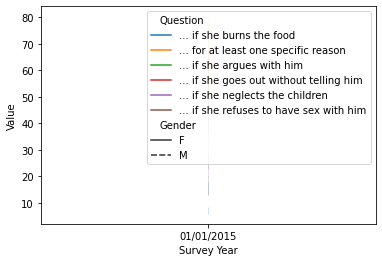

In [33]:
sns.barplot(
    x='',
    y='Value',
    style='Gender',
    data = df_af
)

In [ ]:
sns.lineplot(x="Survey Year", y="Question", )

In [23]:
df_desc.pivot(index=["Country", "Survey Year", "Question"], columns=['Question'], values=["count", "mean", "min", "max", "std", "25%", "50%", "75%"])

KeyError: 'Country'